In [46]:
#required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [47]:
df1=pd.read_csv('/content/ev dat2.csv')
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [49]:
df1['Marital Status']=df1['Marrital Status']
df1['No of Dependants']=df1['No of Dependents']

In [50]:
ed=pd.get_dummies(df1,columns = ['Profession','Marital Status','Personal loan','Education','House Loan','Wife Working'])
ed=ed.drop('Profession_Business',axis=1)
ed=ed.drop('Marrital Status',axis=1)
ed=ed.drop('No of Dependents',axis=1)
ed=ed.drop('Marital Status_Married',axis=1)
ed=ed.drop('Personal loan_No',axis=1)
ed=ed.drop('Education_Graduate',axis=1)
ed=ed.drop('House Loan_No',axis=1)
ed=ed.drop('Wife Working_Yes',axis=1)
ed=ed.drop('Wife Working_m',axis=1)
ed=ed.drop('Make',axis=1)

In [51]:
k={  'Age':ed['Age'],
    'Total Salary':ed['Total Salary'],
    'Price':ed['Price'],
}
kk=pd.DataFrame(k)

In [52]:
kk.head()

,Age,Total Salary,Price
0,27,800000,800000
1,35,2000000,1000000
2,45,1800000,1200000
3,41,2200000,1200000
4,31,2600000,1600000


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(kk)
sed=pd.DataFrame(scaled_data,columns=kk.columns)
sed

,Age,Total Salary,Price
0,0.04,0.12,0.238754
1,0.36,0.36,0.307958
2,0.76,0.32,0.377163
3,0.60,0.40,0.377163
4,0.20,0.48,0.515571
...,...,...,...
94,0.04,0.44,0.515571
95,0.96,0.98,0.515571
96,1.00,0.40,0.342561
97,1.00,0.76,0.480969


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

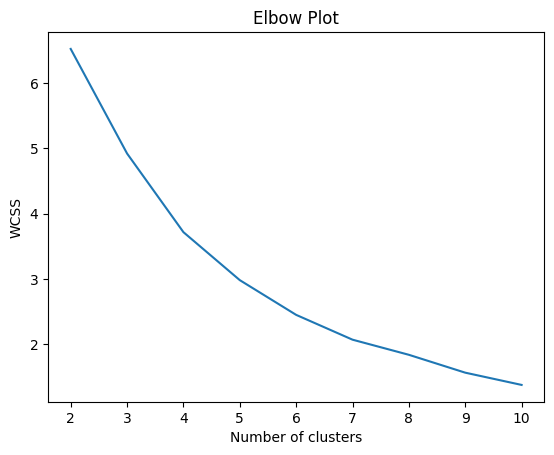

In [54]:
wcss=[]
for i in range(2,11):
  kmeans = KMeans(i)
  kmeans.fit(sed)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,11)
plt.plot(number_clusters,wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

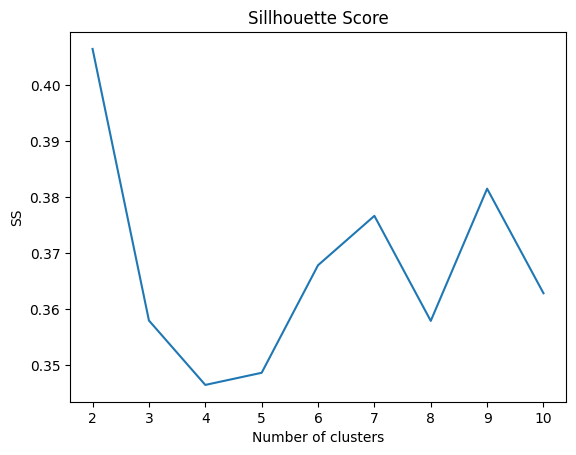

In [94]:
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,11):
  km = KMeans(i)
  km.fit_predict(sed)
  score = silhouette_score(sed, km.labels_, metric='euclidean')
  ss.append(score)
plt.plot(number_clusters,ss)
plt.title('Sillhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show

In [76]:
km=KMeans(5)
ypred=km.fit_predict(sed)
ed['Cluster']=ypred
ed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Salary,Wife Salary,Total Salary,Price,No of Dependants,Profession_Salaried,Marital Status_Single,Personal loan_Yes,Education_Post Graduate,House Loan_Yes,Wife Working_No,Cluster
0,27,800000,0,800000,800000,0,1,1,1,1,0,1,2
1,35,1400000,600000,2000000,1000000,2,1,0,1,1,1,0,1
2,45,1800000,0,1800000,1200000,4,0,0,1,0,1,1,0
3,41,1600000,600000,2200000,1200000,3,0,0,0,1,0,0,0
4,31,1800000,800000,2600000,1600000,2,1,0,1,1,0,0,3


<Axes: xlabel='Price', ylabel='Total Salary'>

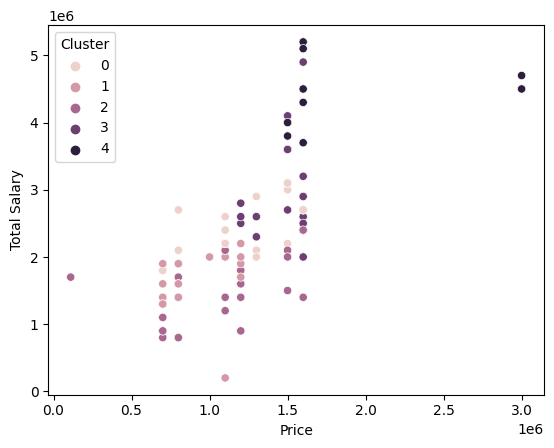

In [77]:
sns.scatterplot(data=ed, x="Price", y="Total Salary",hue='Cluster')

<Axes: xlabel='Age', ylabel='Price'>

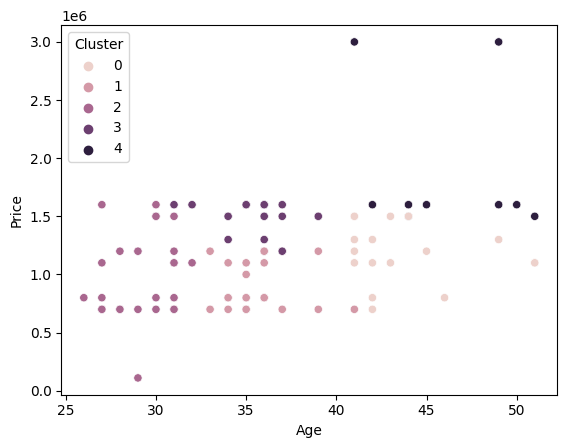

In [78]:
sns.scatterplot(data=ed, x="Age", y="Price",hue='Cluster')

<Axes: xlabel='No of Dependants', ylabel='Price'>

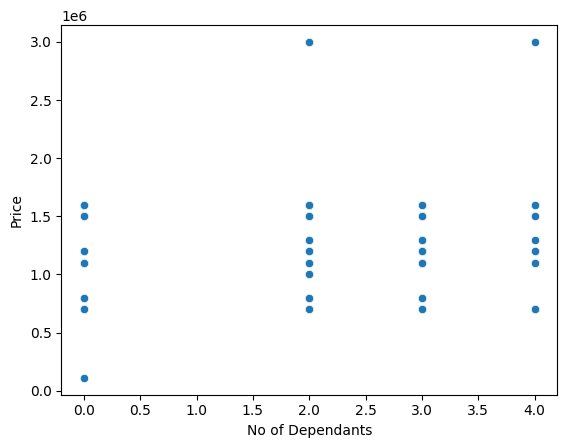

In [79]:
sns.scatterplot(data=ed, x="No of Dependants", y="Price")

<Axes: xlabel='Age', ylabel='Total Salary'>

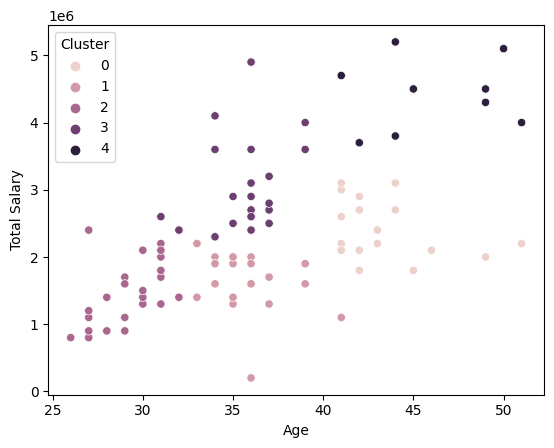

In [80]:
sns.scatterplot(data=ed, x="Age", y="Total Salary",hue='Cluster')

<Axes: xlabel='Age', ylabel='No of Dependants'>

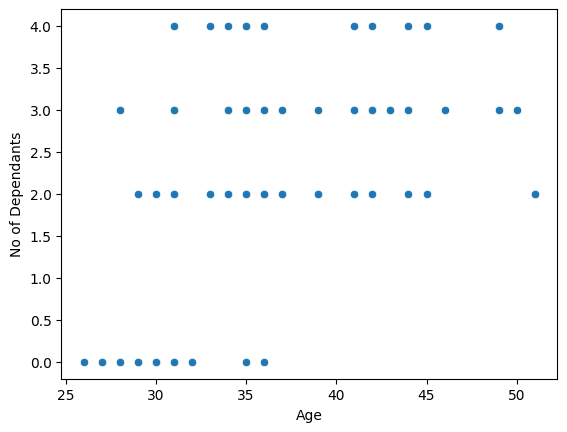

In [81]:
sns.scatterplot(data=ed, y="No of Dependants", x="Age")